In [3]:
!pip install pandas
!pip install numpy
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.7 MB 3.7 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.5/8.7 MB 4.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.7 MB 4.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 4.8 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.8 MB/s  0:00:01
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.5 MB 6.2 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/38.5 MB 6.0 MB/s eta 0:00:07
   --- --------------------------

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## data set

In [9]:
path = r"C:\Users\duda\OneDrive\Documents\GitHub\Data-Mining-Final-Project\Data Files\comodity2017.csv"
df =  pd.read_csv(path)

In [10]:
df.head()


,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,6,99999,06-99999,6,260,06-260,326,4,43,5,4380,391,54,60,N,N,N,N,328.3
1,2,49,482,49-482,47,314,47-314,4541,3,43,14,56,4,1524,1810,N,N,N,N,8425.3
2,3,6,348,06-348,6,348,06-348,4231,4,34,5,255,440,2,5,N,N,N,N,9120.7
3,4,6,260,06-260,6,99999,06-99999,212,4,11,5,250,44912,30,35,N,N,N,N,20.9
4,5,45,273,45-273,45,273,45-273,45431,4,19,5,46,73,9,11,N,N,N,H,1733.8


# Filter for NC origin

In [16]:
df_nc = df[df['ORIG_STATE'] == 37].copy()

In [17]:
# Drop rows with missing export labels
df_nc = df_nc.dropna(subset=['EXPORT_YN'])

In [18]:
df_nc.head()


,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
15,16,37,172,37-172,45,16700,45-16700,4931,1,26,5,13565,4500,173,216,N,N,N,N,254.1
22,23,37,450,37-450,37,99999,37-99999,4244,2,43,4,1495,1368,51,63,Y,N,N,N,344.2
45,46,37,450,37-450,37,450,37-450,4234,1,21,5,447,54,5,11,N,N,N,N,1910.2
53,54,37,99999,37-99999,17,176,17-176,4236,3,35,14,43,1,547,696,N,N,N,N,3229.6
54,55,37,99999,37-99999,37,99999,37-99999,4239,2,41,4,7401,59039,59,71,N,N,N,N,74.6


Pre process

In [20]:
X = df_nc[['SCTG', 'MODE', 'SHIPMT_DIST_ROUTED', 'WGT_FACTOR']]
y = df_nc['EXPORT_YN']  # target (Y/N)

In [21]:
# ------------------------
# Define categorical/numeric
# ------------------------
categorical_features = ['SCTG', 'MODE']
numeric_features = ['SHIPMT_DIST_ROUTED', 'WGT_FACTOR']


In [23]:
# One-hot encode categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# Scale numerical features
numeric_transformer = StandardScaler()


In [24]:
# ----------------------
# Column transformer
# ----------------------
preprocess = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# --------------------------------
# Classification model (Logistic)
# --------------------------------
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(max_iter=200))
])


In [25]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8002   24]
 [ 147  141]]
              precision    recall  f1-score   support

           N       0.98      1.00      0.99      8026
           Y       0.85      0.49      0.62       288

    accuracy                           0.98      8314
   macro avg       0.92      0.74      0.81      8314
weighted avg       0.98      0.98      0.98      8314



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

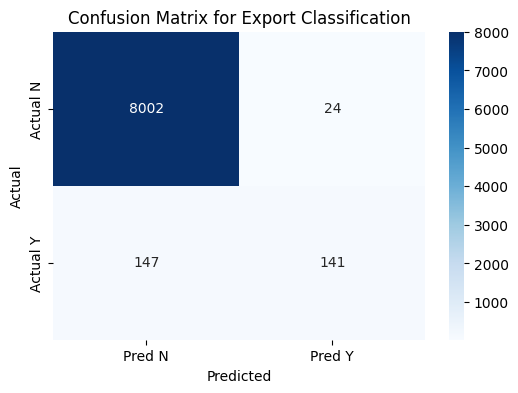

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['N', 'Y'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Pred N', 'Pred Y'],
            yticklabels=['Actual N', 'Actual Y'])
plt.title("Confusion Matrix for Export Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()